# Exploration of Sentiment Analysis on Movie Reviews

For this exploration, I have explored the effects of AAA on BBB of Movie Reviews. 

Initially I imported and printed the data on the screen. 

In [25]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# thinkstats tool
import thinkstats2
import thinkplot

# numpy, matplotlib, seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# get train & test csv files as a DataFrame
train = pd.read_csv("train.tsv", sep='\t')
test = pd.read_csv("test.tsv", sep='\t')

# drop nan data in train
train = train.dropna()

<p>
    Length:
    1. why do we want to look at length
    2. how do we do that in overall
</p>

In [26]:
def createLowerWordList(line):
    """
    Given a line of string, seperates 
    the string into lower case word and
    get rid of punctuations and numbers
    """
    # get a splited words list and an empty list
    wordList1 = line.split()
    wordList2 =[]
    # loop through the word list to get rid of punctuations and convert words to lower case
    for word in wordList1:
        cleanWord = ""
        for char in word:
            if char in '!,.?":;0123456789':
                char = ""
            cleanWord += char
        cleanWord = cleanWord.lower()
        if cleanWord != "":
            wordList2.append(cleanWord)
    return wordList2

def add_length(df):
    """
    Generates a length column for given dataset
    to describe each phrase's length
    """
    length = lambda x: len(createLowerWordList(x))
    df['Length'] = df['Phrase'].apply(length)

def get_average_length_sentiment(df):
    """
    create a dataframe by seperating the data by sentiment
    and compute the mean for the length
    """
    dict = {}
    # sentiment_max stores the value of maxium sentiment, which is 4 in this case
    sentiment_max = 4
    # loop through sentiment and compute the length for the data
    # and store its mean and standard deviation to the dictionary
    for i in range(sentiment_max + 1):
        length_series = df[df['Sentiment'] == i]['Length']
        dict[i] = [length_series.mean(), length_series.std()]
    # convert the dictionary to a dataframe
    length_df = pd.DataFrame(dict.items(), columns=['Sentiment', 'Mean_Std'])
    length_df['Mean'] = length_df['Mean_Std'].apply(lambda x: x[0])
    length_df['Std'] = length_df['Mean_Std'].apply(lambda x: x[1])
    return length_df

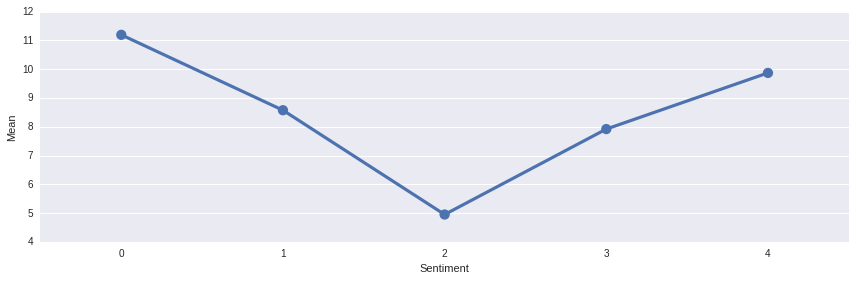

In [35]:
# add Length column to data
add_length(train)
# create a dataframe with analysis of the length data
length_df = get_average_length_sentiment(train)
# factor plot the length versus sentiment
sns.factorplot('Sentiment','Mean', data=length_df,size=4,aspect=3)

<p>
    1. Analyze the significance of these differences
    2. Use the result to interpret our findings 
    3. potential ways of using that data
</p>

<p>
    1. why do we want to look at sentence
    2. how do we do it overall
</p>

/home/yuzhong/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


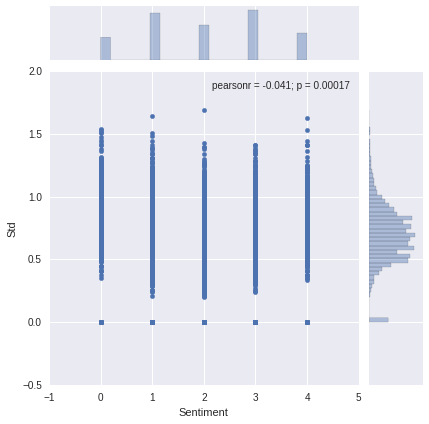

In [3]:
def sentence_df(df):
    """
    sentence_df() groups phrases with same 
    Sentence Id and returns a dataframe with
    each groups's whole sentence's sentiment,
    the phrases' sentiment's standard deviation
    and variance
    """
    # dictionary to store values collected from sentence group
    sentence_dict = {}
    # loop through dataframes with the same sentence ID
    for i in range(df['SentenceId'].max()):
        # select data with sentence ID i
        select_df = df[df['SentenceId'] == i]
        # internally drop Nan data
        if not select_df.empty:
            # store a list with the structure "[overall_sentiment, variance, standard deviation]"
            sentence_dict[i] = [select_df.iloc[0, 3], select_df['Sentiment'].var(), select_df['Sentiment'].std()]
    # convert dictionary to pandas dataframe
    sentence_df = pd.DataFrame(sentence_dict.items(), columns=["Sentence", "Sentiment_Var_Std"])
    
    # split the 'Sentiment_Var_Std' column to 'Sentiment', 'Var', 'Std'
    sentence_df['Sentiment'] = sentence_df['Sentiment_Var_Std'].apply(lambda x: x[0])
    sentence_df['Var'] = sentence_df['Sentiment_Var_Std'].apply(lambda x: x[1])
    sentence_df['Std'] = sentence_df['Sentiment_Var_Std'].apply(lambda x: x[2])
        
    return sentence_df.drop('Sentiment_Var_Std', axis=1)

# get a dataframe grouped by sentence ID of train dataset
sentence_df = sentence_df(train)
# plot the joint plot of standard deviation of phases within same sentence ID over sentiments 
sns.jointplot(x="Sentiment", y="Std", data=sentence_df[['Sentiment', 'Std']]);

We can roughly tell that the distribution of each sentiment group is different from each other, but the pattern is very vague. We can hardly tell anything from that graph. In order to verify our hypothesis that the difference between each sentiment group is statistically significant. We further explore the data by seperating the data into different sentiment groups and explore their differences.

In [4]:
# seperates the dataframe according to sentiment and sort the data with standard deviation
sentence_zero_df = sentence_df[sentence_df['Sentiment'] == 0].sort_values(['Std'], ascending=True).dropna()
sentence_one_df = sentence_df[sentence_df['Sentiment'] == 1].sort_values(['Std'], ascending=True).dropna()
sentence_two_df = sentence_df[sentence_df['Sentiment'] == 2].sort_values(['Std'], ascending=True).dropna()
sentence_three_df = sentence_df[sentence_df['Sentiment'] == 3].sort_values(['Std'], ascending=True).dropna()
sentence_four_df = sentence_df[sentence_df['Sentiment'] == 4].sort_values(['Std'], ascending=True).dropna()

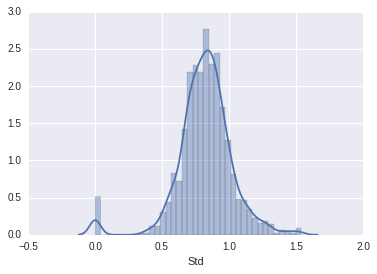

In [33]:
sns.distplot(sentence_zero_df['Std'])

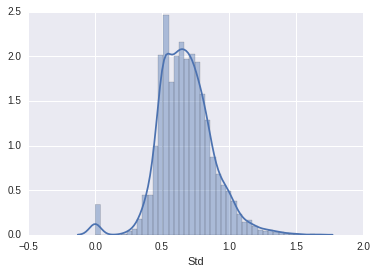

In [16]:
sns.distplot(sentence_one_df['Std'])

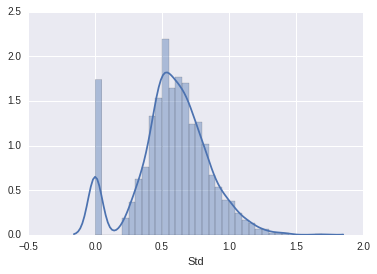

In [7]:
sns.distplot(sentence_two_df['Std'])

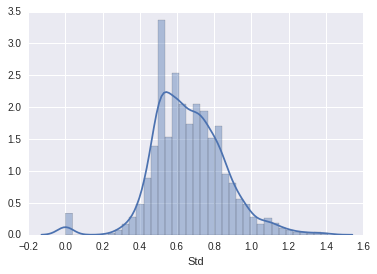

In [8]:
sns.distplot(sentence_three_df['Std'])

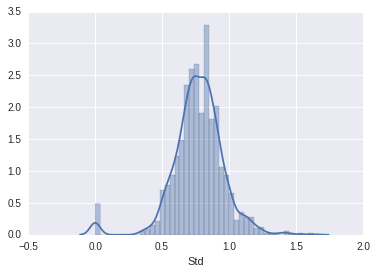

In [36]:
sns.distplot(sentence_four_df['Std'])

<p>
    1. Analyze the significance of these differences 
    2. Use the result to interpret our findings 
    3. potential ways of using that data
</p>

<p>
    1. why do we want to look at word
    2. how do we do it overall
</p>

In [38]:
def word_df(df):
    word_dict = {}
    for index, row in df.iterrows():
        list = createLowerWordList(row["Phrase"])
        sentiment = row["Sentiment"]
        
        for word in list:
            if word in word_dict:
                word_dict[word][0] += 1
                word_dict[word][1].append(sentiment)
            else:
                word_dict[word] = [1, [sentiment]]
    
    word_df = pd.DataFrame(word_dict.items(), columns=["Word", "Frequency-Sentiment"])
    word_df['Frequency'] = word_df['Frequency-Sentiment'].apply(lambda x: x[0])
    word_df['Sentiment'] = word_df['Frequency-Sentiment'].apply(lambda x: np.mean(x[1]))
    word_df['Std'] = word_df['Frequency-Sentiment'].apply(lambda x: float(np.std(x[1])))
    return word_df.drop('Frequency-Sentiment', 1).dropna().sort_values(['Frequency'], ascending=False)

<p>
    1. cut the frequency (articulate reasons for that)
    2. choose the sentiment range (articulate reasons for that)
    3. std (articulate reasons for that)
    4. create a word list and show potential ways to use it
    5. compare it to result in the discussion form
</p>

In [ ]:
word_df = word_df(train)

64.89057135850908

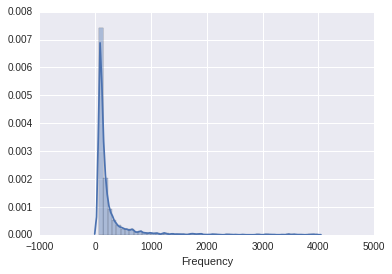

In [14]:
sns.distplot(word_df[(word_df['Frequency'] > 64) & (word_df['Frequency'] < 4700)].Frequency);
word_df['Frequency'].mean()

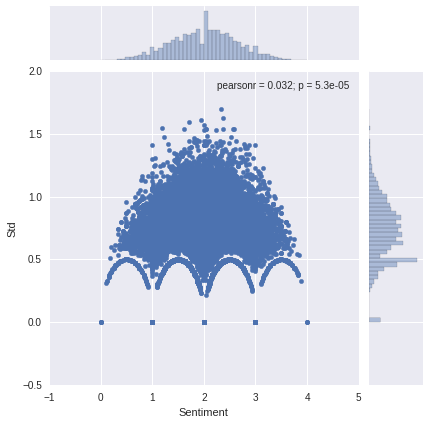

In [15]:
sns.jointplot(word_df['Sentiment'], word_df['Std']);